In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf
from tensorflow.keras import models, backend
from keras.optimizers import SGD
from keras.layers import Flatten, Dense
from keras.datasets import cifar10

In [4]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
ytrain.shape

(50000, 1)

In [7]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [8]:
ytrain = tf.keras.utils.to_categorical(ytrain, 10)
ytest = tf.keras.utils.to_categorical(ytest, 10)

In [9]:
ytrain.shape

(50000, 10)

In [33]:
model = models.Sequential(
    [
        Flatten(input_shape = (32,32,3)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)

In [34]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2553 - loss: 2.0339 - val_accuracy: 0.3542 - val_loss: 1.8059
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3726 - loss: 1.7519 - val_accuracy: 0.3341 - val_loss: 1.8005
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4113 - loss: 1.6518 - val_accuracy: 0.4375 - val_loss: 1.5877
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4386 - loss: 1.5863 - val_accuracy: 0.4380 - val_loss: 1.5683
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4442 - loss: 1.5494 - val_accuracy: 0.4442 - val_loss: 1.5485
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4621 - loss: 1.5095 - val_accuracy: 0.4168 - val_loss: 1.6233
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4733 - loss: 1.4758 - val_accuracy: 0.4460 - val_loss: 1.5478
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4813 - loss: 1.4568 - 

In [36]:
test_loss, test_acc = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4835 - loss: 1.4460


In [37]:
test_loss

1.4472415447235107

In [38]:
test_acc

0.48080000281333923

In [39]:
ytest = np.argmax(ytest, axis = 1)

In [40]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
ypred = np.argmax(ypred, axis = 1)

In [42]:
csr = classification_report(ytest, ypred)

In [43]:
print(csr)

              precision    recall  f1-score   support

           0       0.49      0.67      0.56      1000
           1       0.59      0.61      0.60      1000
           2       0.37      0.35      0.36      1000
           3       0.38      0.26      0.31      1000
           4       0.54      0.22      0.32      1000
           5       0.43      0.33      0.37      1000
           6       0.39      0.77      0.52      1000
           7       0.53      0.55      0.54      1000
           8       0.66      0.51      0.58      1000
           9       0.53      0.55      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



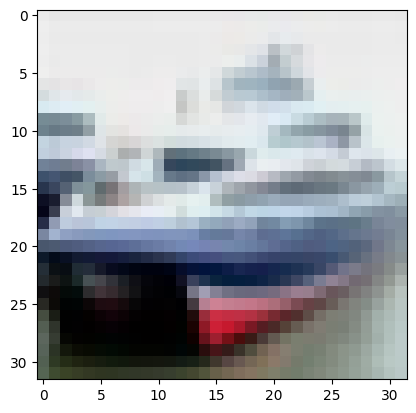

9


In [45]:
plt.imshow(xtest[1])
plt.show()
print(ypred[1])

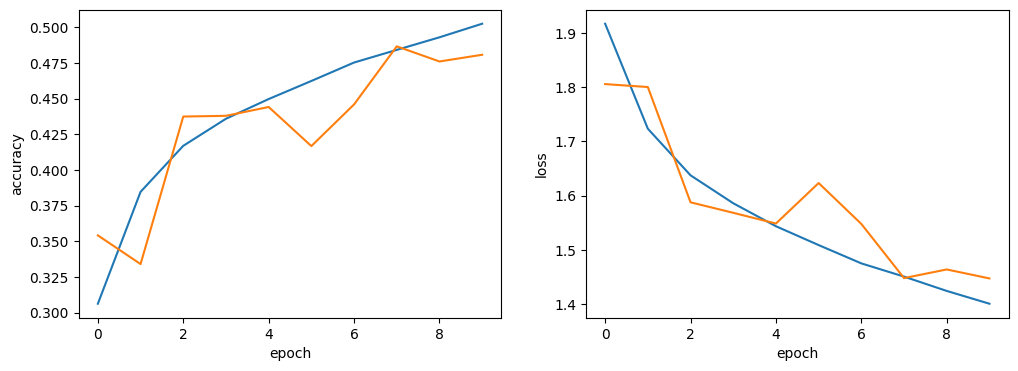

In [52]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()